# Steps:

Ask the following questions and look for the answers using code and plots:

Can you count something interesting?

Can you find trends (e.g. high, low, increasing, decreasing, anomalies)? 

Can you make a bar plot or a histogram? YES

Can you compare two related quantities? YES

Can you make a scatterplot? YES

Can you make a time-series plot?

Looking at the plots, what are some insights you can make? 

Do you see any correlations? YES

Is there a hypothesis you’d like to investigate further? 

What other questions do the insights lead you to ask?

Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? 

What are some other trends/relationships you think will make the story more complete?

# Submission: 
Submit links to a GitHub repository containing a Jupyter Notebook. The Notebook should contain:

The questions you asked

The trends you investigated

The resulting visualizations and conclusions


# The big question I want to ask is how different features correlate to the movie revenue (gross - budget)?

In [1]:
# import required packages
import pandas as pd
import numpy as np
import math
from collections import Counter

In [2]:
# import plot packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('wrangle.csv')

In [4]:
# add revenue column
# change unit to 1 million
df['revenue'] = df.gross - df.budget
df.budget = df['budget'] / 1000000
df.gross = df['gross'] / 1000000
df.revenue = df['revenue'] / 1000000

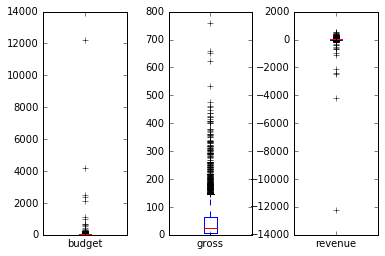

In [5]:
plt.subplot(1, 3, 1)
df['budget'].plot(kind='box')

plt.subplot(1, 3, 2)
df['gross'].plot(kind='box')

plt.subplot(1, 3, 3)
df['revenue'].plot(kind='box')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [6]:
# roughly set a boundary for outlier from the boxplot 
budget_outlier = df[(df.budget < 400) & (df.budget > 0)]
gross_outlier = df[(df.gross < 300) & (df.budget > 0)]
revenue_outlier = df[(df.revenue > -400) & (df.revenue < 400)]

In [7]:
# make sure I did not remove too many data points
print(len(budget_outlier), len(gross_outlier), len(revenue_outlier))

(4087, 4037, 4082)


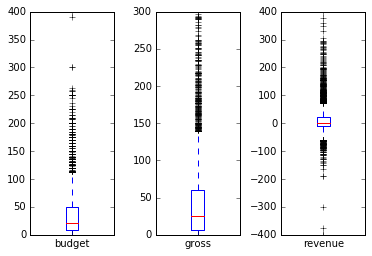

In [8]:
plt.subplot(1, 3, 1)
budget_outlier['budget'].plot(kind='box')

plt.subplot(1, 3, 2)
gross_outlier['gross'].plot(kind='box')

plt.subplot(1, 3, 3)
revenue_outlier['revenue'].plot(kind='box')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

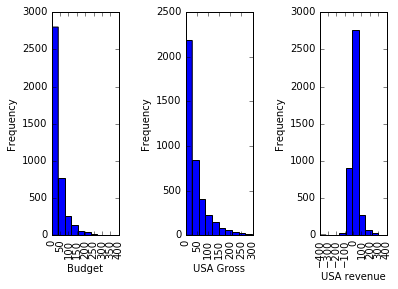

In [9]:
plt.subplot(1, 3, 1)
budget_outlier['budget'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('Budget')

plt.subplot(1, 3, 2)
gross_outlier['gross'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA Gross')

plt.subplot(1, 3, 3)
revenue_outlier['revenue'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA revenue')

plt.subplots_adjust(hspace=0.5, wspace=1)


## Q1: Is IMDB score a good indicator of budget, gross, and revenue?
## A1: From the scatter plots, I can easily tell that high IMDB scores can indicate the movies with high buget and high USA gross. However, movies with high IMDB scores can lead the revenue positively and negatively. If I just eyeball it, there is more chance to make money from the higher IMDB score.

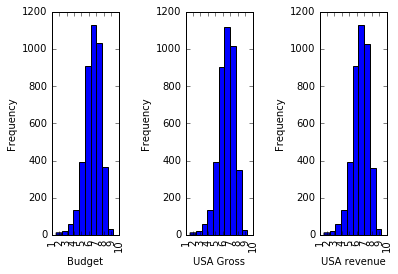

In [10]:
plt.subplot(1, 3, 1)
budget_outlier['imdb_score'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('Budget')

plt.subplot(1, 3, 2)
gross_outlier['imdb_score'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA Gross')

plt.subplot(1, 3, 3)
revenue_outlier['imdb_score'].plot(kind='hist')
plt.xticks(rotation=90)
plt.xlabel('USA revenue')

plt.subplots_adjust(hspace=0.5, wspace=1)

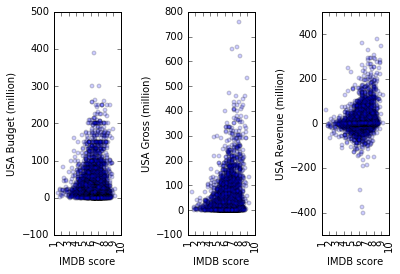

In [11]:
plt.subplot(1,3,1)
plt.scatter(x='imdb_score', y='budget', data=budget_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Budget (million)')

plt.subplot(1,3,2)
plt.scatter(x='imdb_score', y='gross', data=budget_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Gross (million)')

plt.subplot(1,3,3)
plt.scatter(x='imdb_score', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Revenue (million)')

plt.subplots_adjust(hspace=0.5, wspace=1)

** focus on imdb score between 5-8 **

In [12]:
budget_outlier_imdb = budget_outlier[(budget_outlier.imdb_score > 5) & (budget_outlier.imdb_score < 8)]
gross_outlier_imdb = gross_outlier[(gross_outlier.imdb_score > 5) & (gross_outlier.imdb_score < 8)]
revenue_outlier_imdb = revenue_outlier[(revenue_outlier.imdb_score > 5) & (revenue_outlier.imdb_score < 8)]

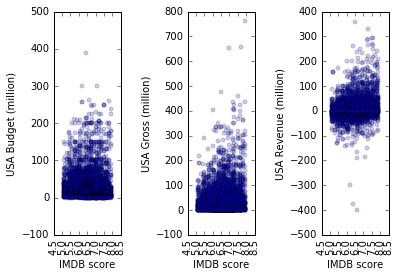

In [13]:
plt.subplot(1,3,1)
plt.scatter(x='imdb_score', y='budget', data=budget_outlier_imdb, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Budget (million)')

plt.subplot(1,3,2)
plt.scatter(x='imdb_score', y='gross', data=budget_outlier_imdb, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Gross (million)')

plt.subplot(1,3,3)
plt.scatter(x='imdb_score', y='revenue', data=revenue_outlier_imdb, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('IMDB score')
plt.ylabel('USA Revenue (million)')

plt.subplots_adjust(hspace=0.5, wspace=1)

## Q2: Is the budget correlated to the revenue? 
## A2: Interestingly, the buget and revenue seem to have a negative coreelation instead of positive one if the movies don't make profits.

**Compare budget, gross, and revenue in scatter plot**

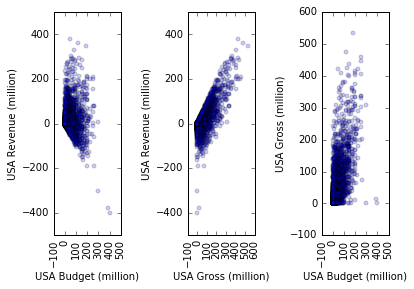

In [148]:
plt.subplot(1,3,1)
plt.scatter(x='budget', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('USA Budget (million)')
plt.ylabel('USA Revenue (million)')

plt.subplot(1,3,2)
plt.scatter(x='gross', y='revenue', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('USA Gross (million)')
plt.ylabel('USA Revenue (million)')

plt.subplot(1,3,3)
plt.scatter(x='budget', y='gross', data=revenue_outlier, s=15, alpha=0.2)
plt.xticks(rotation=90)
plt.xlabel('USA Budget (million)')
plt.ylabel('USA Gross (million)')

plt.subplots_adjust(hspace=0.5, wspace=1)


**Focus on the budget and negative revenue**

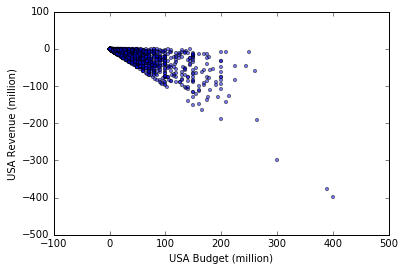

In [15]:
money_loss = revenue_outlier[(revenue_outlier['revenue'] < 0)]
plt.scatter(x='budget', y='revenue', data=money_loss, s=10, alpha=0.5)
plt.xlabel('USA Budget (million)')
plt.ylabel('USA Revenue (million)')

## Q3: Is the revenue increasing with the year from 1916 to 2016? 
## A3: I don't find a dramatic increase of revnue along the years.

** Check the trend of revenue from 1916 to 2016. Even it looks like there is a positive growth of revenue, it is because of different amount of data points in different years. **

([<matplotlib.axis.XTick at 0x110152510>,
 <a list of 3 Text xticklabel objects>)

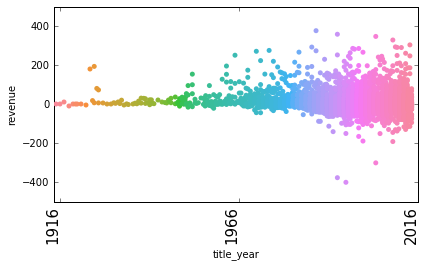

In [16]:
ax = sns.swarmplot(x='title_year', y= 'revenue', data=revenue_outlier)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.tight_layout()
plt.xticks([1, 43, 85], ['1916', '1966', '2016'])

In [17]:
Counter(revenue_outlier['title_year'])

Counter({1916.0: 1,
         1920.0: 1,
         1925.0: 1,
         1927.0: 1,
         1929.0: 1,
         1933.0: 2,
         1935.0: 1,
         1936.0: 1,
         1937.0: 1,
         1939.0: 3,
         1940.0: 3,
         1941.0: 1,
         1942.0: 1,
         1943.0: 1,
         1945.0: 2,
         1946.0: 3,
         1947.0: 1,
         1948.0: 2,
         1950.0: 1,
         1951.0: 3,
         1952.0: 3,
         1953.0: 3,
         1954.0: 4,
         1956.0: 2,
         1957.0: 1,
         1958.0: 1,
         1959.0: 3,
         1960.0: 3,
         1961.0: 2,
         1962.0: 7,
         1963.0: 8,
         1964.0: 9,
         1965.0: 5,
         1966.0: 4,
         1967.0: 1,
         1968.0: 8,
         1969.0: 7,
         1970.0: 8,
         1971.0: 8,
         1972.0: 5,
         1973.0: 9,
         1974.0: 9,
         1975.0: 6,
         1976.0: 7,
         1977.0: 13,
         1978.0: 13,
         1979.0: 13,
         1980.0: 20,
         1981.0: 29,
         1982.0

**Split title years into 3 groups (before 1916-1977, 1977-1997, 1997-2016) since data points in different years are split differently**

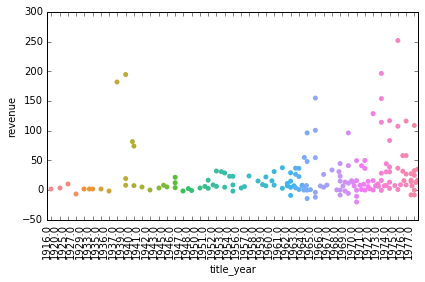

In [18]:
before1977 = revenue_outlier[(revenue_outlier['title_year'] <= 1977)]
ax1 = sns.swarmplot(x='title_year', y= 'revenue', data=before1977)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=10)
plt.tight_layout()

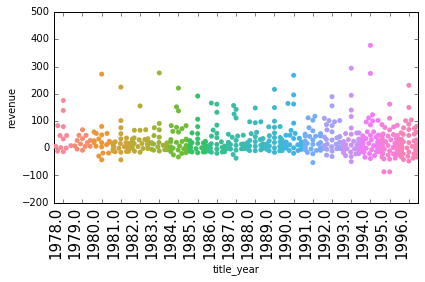

In [19]:
between = revenue_outlier[(revenue_outlier['title_year'] > 1977) & (revenue_outlier['title_year'] < 1997)]
ax2 = sns.swarmplot(x='title_year', y='revenue', data=between)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.tight_layout()

(-400, 500)

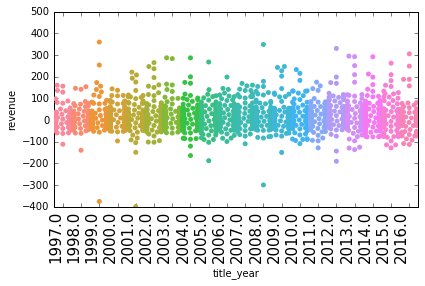

In [20]:
after1997 = revenue_outlier[(revenue_outlier['title_year'] >= 1997)]
ax3 = sns.swarmplot(x='title_year', y='revenue', data=after1997)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right", fontsize=15)
plt.tight_layout()
plt.ylim(-400, 500)

## Q4: Is there a seasonal trend of revenue?
## A4: In terms of revenue, June might be the best timing to release the new movie.

** import imdb_month dictionary that I scrape from the IMDB website when I did data wrangling **

In [21]:
import json
with open('imdb_month.json', 'r') as f:
    imdb_month = json.load(f)

In [22]:
df['month'] = df.movie_imdb_link.map(imdb_month)

In [36]:
df_date = df.dropna(axis=0)

In [37]:
df_date.loc[:, 'month'] = df_date['month'].str[0]

In [38]:
len(df_date[df_date.month.isnull()])

2

In [39]:
df_date = df_date.dropna(axis=0)

In [40]:
len(df_date[df_date.month.isnull()])

0

In [41]:
df_date.loc[:, 'month'] =df_date.loc[:, 'month'].str.replace('\d+', '')

In [42]:
df_date.loc[:, 'month'] =df_date.loc[:, 'month'].str.replace(' ', '')

In [151]:
# change column name
# df_date = df_date.rename(index=str, columns={'date':'month'})

** change month to datetime **

In [43]:
df_date.loc[:, 'month'] = pd.to_datetime(df_date['month'], format='%B', errors='coerce').dt.month

** check outlier **

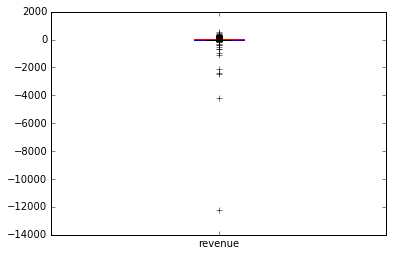

In [47]:
df_date['revenue'].plot(kind='box')

In [48]:
df_date_outlier = df_date[(df_date.revenue > -400)]

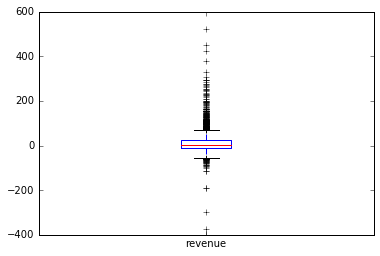

In [49]:
df_date_outlier['revenue'].plot(kind='box')

** check with plots **

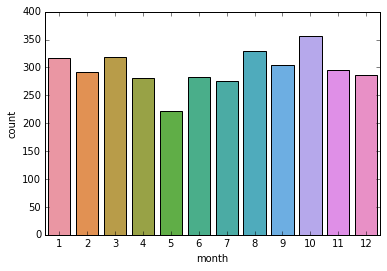

In [50]:
sns.countplot(x='month', data=df_date_outlier)

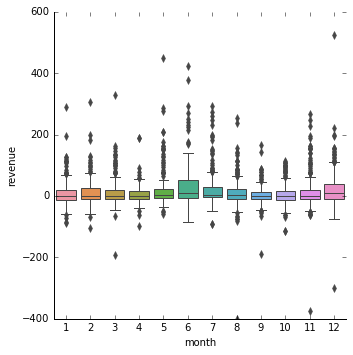

In [51]:
sns.catplot(x='month', y='revenue', kind='box', data=df_date_outlier)

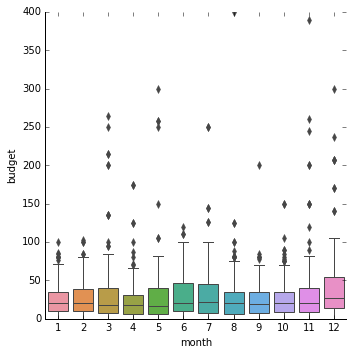

In [52]:
sns.catplot(x='month', y='budget', kind='box', data=df_date_outlier)

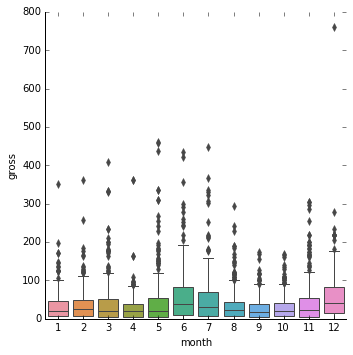

In [64]:
sns.catplot(x='month', y='gross', kind='box', data=df_date_outlier)

# Q5: Is any particular genre makig more money?
# A5: Any one of following category: Adventure, Animation, Comedy, Family, Fantasy, Horror, Music, Romance category might be a good profit indicator for movies

In [80]:
df_genre = df.copy()

In [81]:
s = df_genre['genres'].str.split('|', expand=False)

In [85]:
# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
dummy = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [86]:
df_genre = pd.concat([df, dummy], axis=1)

In [145]:
dummy.shape

(4099, 24)

In [90]:
# roughly set a boundary for outlier from the boxplot 
df_genre = df_genre[(df_genre.revenue > -400) & (df_genre.revenue < 400)]

** Find out which genre has higher mean amd median in revenue **

In [144]:
genre_list = df_genre.columns[31:]

In [154]:
for i in genre_list:
    temp_yes = df_genre[df_genre[i] == 1]
    temp_no = df_genre[df_genre[i] == 0]
    mean_yes = np.mean(temp_yes['revenue'])
    mean_no = np.mean(temp_no['revenue'])
    median_yes = np.median(temp_yes['revenue'])
    median_no = np.median(temp_no['revenue'])
    if (mean_yes > mean_no) & (median_yes > median_no):
        print i

Adventure
Animation
Comedy
Family
Fantasy
Horror
Music
Romance


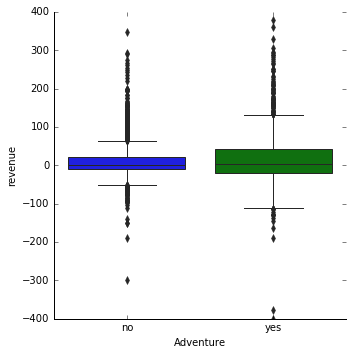

In [156]:
g1 = sns.catplot(x='Adventure', y='revenue', kind='box', data=df_genre)
g1.set_xticklabels(['no', 'yes'])

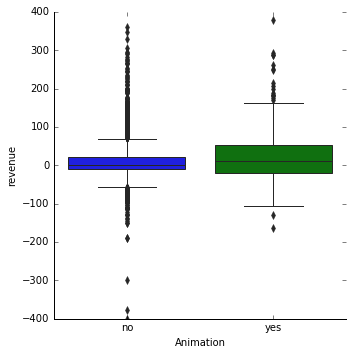

In [120]:
g = sns.catplot(x='Animation', y='revenue', kind='box', data=df_genre)
g.set_xticklabels(['no', 'yes'])

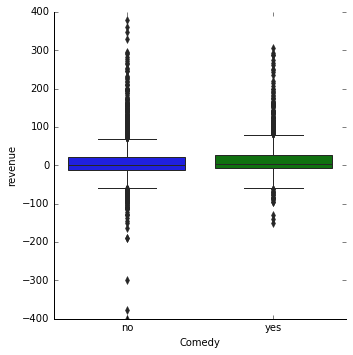

In [157]:
g2 = sns.catplot(x='Comedy', y='revenue', kind='box', data=df_genre)
g2.set_xticklabels(['no', 'yes'])

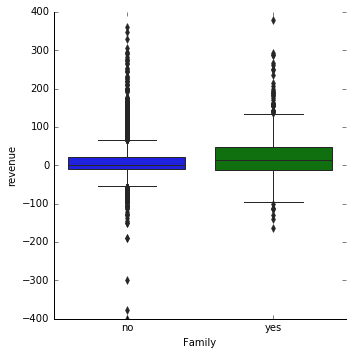

In [158]:
g3 = sns.catplot(x='Family', y='revenue', kind='box', data=df_genre)
g3.set_xticklabels(['no', 'yes'])

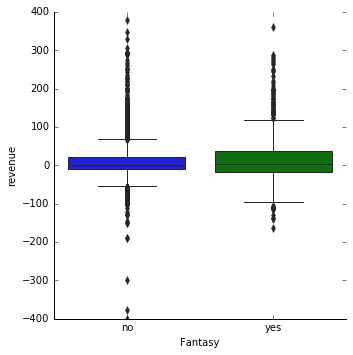

In [159]:
g4 = sns.catplot(x='Fantasy', y='revenue', kind='box', data=df_genre)
g4.set_xticklabels(['no', 'yes'])

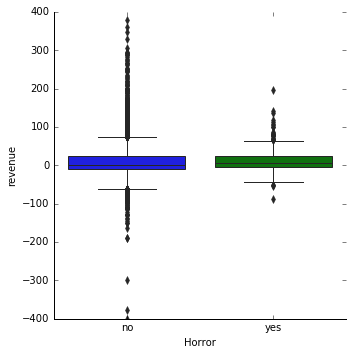

In [160]:
g5 = sns.catplot(x='Horror', y='revenue', kind='box', data=df_genre)
g5.set_xticklabels(['no', 'yes'])

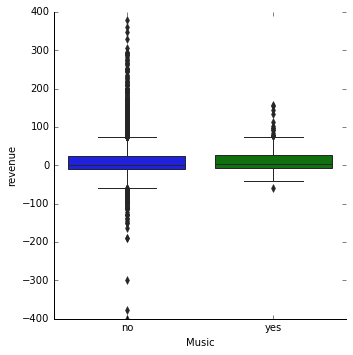

In [161]:
g6 = sns.catplot(x='Music', y='revenue', kind='box', data=df_genre)
g6.set_xticklabels(['no', 'yes'])

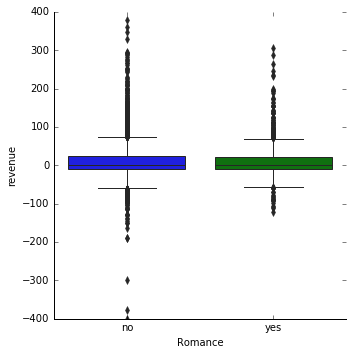

In [162]:
g7 = sns.catplot(x='Romance', y='revenue', kind='box', data=df_genre)
g7.set_xticklabels(['no', 'yes'])

# Backup informaiton

# ECDF

In [30]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / float(n)

    return x, y

In [31]:
x_totalgross, y_totalgross = ecdf(total_revenue_outlier['total_revenue'])
x_gross, y_gross = ecdf(total_revenue_outlier['revenue'])

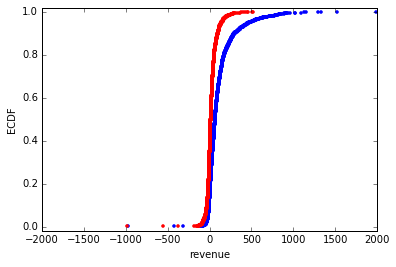

In [32]:
plt.plot(x_totalgross, y_totalgross, marker='.', linestyle='none')
plt.xlabel('total_revenue')
plt.ylabel('ECDF')
plt.margins(0.02)

plt.plot(x_gross, y_gross, marker='.', linestyle='none', color='red')
plt.xlabel('revenue')
plt.ylabel('ECDF')
plt.xlim(-2000, 2000)
plt.margins(0.02)